<a href="https://colab.research.google.com/github/hiyoman/ai/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D(%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd

Saving 도로살얼음 데이터정리1.csv to 도로살얼음 데이터정리1 (3).csv


In [2]:
import numpy as np
df = pd.read_csv(io.StringIO(uploaded['도로살얼음 데이터정리1.csv'].decode('cp949')))

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


In [4]:
x = df.drop(['마찰계수','YYMMDD','HHMMSS','풍향','풍속'], axis = 1)
target = df['마찰계수'].values

In [5]:
x.head(5)


,대기온도,대기습도,기압,노면온도,시간 강수량,6시간 누적 강수량
0,8.1,44.4,982.1,11.18825,0.0,0.0
1,8.1,44.4,982.1,11.27556,0.0,0.0
2,8.2,44.7,982.0,11.37037,0.0,0.0
3,8.3,44.2,982.0,11.47577,0.0,0.0
4,8.4,43.9,982.0,11.57402,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size = 0.3)

In [7]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.values.reshape(-1,6), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [8]:
y_pred = regressor.predict(X_test.values.reshape(-1,6))
y_pred

array([0.81666936, 0.81983657, 0.8170575 , ..., 0.81997242, 0.8199904 ,
       0.81998679])

In [9]:
y_test

array([0.8171309, 0.8200001, 0.816879 , ..., 0.8200001, 0.8200001,
       0.8200001])

In [10]:
df1 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

In [11]:
df

,YYMMDD,HHMMSS,풍향,풍속,대기온도,대기습도,기압,노면온도,시간 강수량,6시간 누적 강수량,마찰계수
0,201113,101600,294.0,1.2,8.1,44.4,982.1,11.18825,0.0,0.0,0.82
1,201113,101700,309.0,0.9,8.1,44.4,982.1,11.27556,0.0,0.0,0.82
2,201113,101800,306.0,1.1,8.2,44.7,982.0,11.37037,0.0,0.0,0.82
3,201113,101900,264.0,1.0,8.3,44.2,982.0,11.47577,0.0,0.0,0.82
4,201113,102000,287.0,1.5,8.4,43.9,982.0,11.57402,0.0,0.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...
195661,210423,112000,284.0,1.4,15.8,25.6,974.8,19.83942,0.0,0.0,0.82
195662,210423,112100,283.0,3.3,15.8,25.4,974.8,19.91520,0.0,0.0,0.82
195663,210423,112200,282.0,2.3,15.9,25.4,974.8,19.91263,0.0,0.0,0.82
195664,210423,112300,223.0,1.4,15.9,25.4,974.8,19.89042,0.0,0.0,0.82


In [12]:
 from sklearn.metrics import mean_squared_error
 mse = np.sqrt(mean_squared_error(y_pred, y_test))
 rmse = np.sqrt(mse)

In [13]:
print('mse : ', mse)
print('rmse : ', rmse)

mse :  0.008137080311189494
rmse :  0.09020576650741068


In [14]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


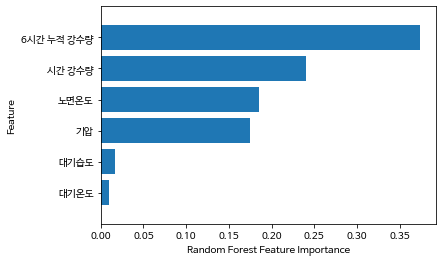

In [15]:
def plot_feature_importance(model):
  n_features = X_train.shape[1] 
  plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
  plt.yticks(np.arange(n_features), X_train.columns)
  plt.xlabel("Random Forest Feature Importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
    
    
plot_feature_importance(regressor)